In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
#Load Data
ask_5m = pd.read_csv('ETHUSD_Candlestick_5_M_ASK_01.01.2024-31.12.2024.csv')
bid_5m = pd.read_csv('ETHUSD_Candlestick_5_M_BID_01.01.2024-31.12.2024 (1).csv')

In [3]:
#Print Rows for Ask data
print(ask_5m.head(5))
print(ask_5m.tail(5))

                         Local time  Open  High   Low  Close  Volume
0  01.01.2024 21:00:00.000 GMT-0000  2338  2347  2338   2346  0.0812
1  01.01.2024 21:05:00.000 GMT-0000  2346  2349  2345   2345  0.0860
2  01.01.2024 21:10:00.000 GMT-0000  2345  2346  2344   2344  0.0436
3  01.01.2024 21:15:00.000 GMT-0000  2344  2345  2343   2343  0.0346
4  01.01.2024 21:20:00.000 GMT-0000  2344  2344  2341   2341  0.0759
                              Local time  Open  High   Low  Close  Volume
104835  31.12.2024 14:35:00.000 GMT-0000  3440  3442  3421   3423  0.0312
104836  31.12.2024 14:40:00.000 GMT-0000  3423  3434  3421   3431  0.0330
104837  31.12.2024 14:45:00.000 GMT-0000  3431  3438  3428   3431  0.0380
104838  31.12.2024 14:50:00.000 GMT-0000  3431  3434  3419   3424  0.0269
104839  31.12.2024 14:55:00.000 GMT-0000  3424  3427  3421   3427  0.0207


In [4]:
##Print Rows for Bid data
print(bid_5m.head(5))
print(bid_5m.tail(5))

                         Local time  Open  High   Low  Close  Volume
0  01.01.2024 21:00:00.000 GMT-0000  2338  2341  2336   2340  0.0795
1  01.01.2024 21:05:00.000 GMT-0000  2341  2343  2338   2339  0.0831
2  01.01.2024 21:10:00.000 GMT-0000  2339  2340  2338   2338  0.0420
3  01.01.2024 21:15:00.000 GMT-0000  2338  2338  2337   2337  0.0499
4  01.01.2024 21:20:00.000 GMT-0000  2337  2338  2334   2335  0.0765
                              Local time  Open  High   Low  Close  Volume
104842  31.12.2024 14:35:00.000 GMT-0000  3433  3436  3415   3416  0.0202
104843  31.12.2024 14:40:00.000 GMT-0000  3417  3428  3415   3425  0.0178
104844  31.12.2024 14:45:00.000 GMT-0000  3425  3433  3422   3425  0.0187
104845  31.12.2024 14:50:00.000 GMT-0000  3425  3428  3413   3419  0.0177
104846  31.12.2024 14:55:00.000 GMT-0000  3419  3421  3415   3421  0.0126


In [5]:
#Merge Ask and Bid data
data = pd.merge(bid_5m, ask_5m, on='Local time', how='outer', suffixes=('_bid', '_ask'))
data

,Local time,Open_bid,High_bid,Low_bid,Close_bid,Volume_bid,Open_ask,High_ask,Low_ask,Close_ask,Volume_ask
0,01.01.2024 21:00:00.000 GMT-0000,2338,2341,2336,2340,0.0795,2338.0,2347.0,2338.0,2346.0,0.0812
1,01.01.2024 21:05:00.000 GMT-0000,2341,2343,2338,2339,0.0831,2346.0,2349.0,2345.0,2345.0,0.0860
2,01.01.2024 21:10:00.000 GMT-0000,2339,2340,2338,2338,0.0420,2345.0,2346.0,2344.0,2344.0,0.0436
3,01.01.2024 21:15:00.000 GMT-0000,2338,2338,2337,2337,0.0499,2344.0,2345.0,2343.0,2343.0,0.0346
4,01.01.2024 21:20:00.000 GMT-0000,2337,2338,2334,2335,0.0765,2344.0,2344.0,2341.0,2341.0,0.0759
...,...,...,...,...,...,...,...,...,...,...,...
104842,31.12.2024 14:35:00.000 GMT-0000,3433,3436,3415,3416,0.0202,3440.0,3442.0,3421.0,3423.0,0.0312
104843,31.12.2024 14:40:00.000 GMT-0000,3417,3428,3415,3425,0.0178,3423.0,3434.0,3421.0,3431.0,0.0330
104844,31.12.2024 14:45:00.000 GMT-0000,3425,3433,3422,3425,0.0187,3431.0,3438.0,3428.0,3431.0,0.0380
104845,31.12.2024 14:50:00.000 GMT-0000,3425,3428,3413,3419,0.0177,3431.0,3434.0,3419.0,3424.0,0.0269


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104847 entries, 0 to 104846
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Local time  104847 non-null  object 
 1   Open_bid    104847 non-null  int64  
 2   High_bid    104847 non-null  int64  
 3   Low_bid     104847 non-null  int64  
 4   Close_bid   104847 non-null  int64  
 5   Volume_bid  104847 non-null  float64
 6   Open_ask    104840 non-null  float64
 7   High_ask    104840 non-null  float64
 8   Low_ask     104840 non-null  float64
 9   Close_ask   104840 non-null  float64
 10  Volume_ask  104840 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 8.8+ MB


In [7]:
#Drop Null Values
data.dropna(inplace=True)

In [8]:
#rename columns

data.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [9]:
#Check the merged data
data.head(5)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,01.01.2024 21:00:00.000 GMT-0000,2338,2341,2336,2340,0.0795,2338.0,2347.0,2338.0,2346.0,0.0812
1,01.01.2024 21:05:00.000 GMT-0000,2341,2343,2338,2339,0.0831,2346.0,2349.0,2345.0,2345.0,0.0860
2,01.01.2024 21:10:00.000 GMT-0000,2339,2340,2338,2338,0.0420,2345.0,2346.0,2344.0,2344.0,0.0436
3,01.01.2024 21:15:00.000 GMT-0000,2338,2338,2337,2337,0.0499,2344.0,2345.0,2343.0,2343.0,0.0346
4,01.01.2024 21:20:00.000 GMT-0000,2337,2338,2334,2335,0.0765,2344.0,2344.0,2341.0,2341.0,0.0759


In [10]:
#Delta of trading volumes for the merged data
data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
data["Volume_Delta_abs"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()

In [11]:
data["Open_Delta"] = data["Open_Ask"]  - data["Open_Bid"]
data["High_Delta"] = data["High_Ask"]  - data["High_Bid"]
data["Low_Delta"]  = data["Low_Ask"]   - data["Low_Bid"]
data["Close_Delta"]= data["Close_Ask"] - data["Close_Bid"]

In [12]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,104840.000000,104840.00000,104840.000000,104840.000000,104840.00000,104840.000000,104840.000000,104840.000000,104840.000000,104840.000000,104840.000000,104840.000000,104840.000000,104840.000000,104840.000000,104840.000000
mean,3042.508432,3046.10145,3038.791301,3042.526230,0.17911,3047.658565,3051.217646,3043.960464,3047.666349,0.131694,-0.047416,0.089098,5.150134,5.116196,5.169163,5.140118
std,509.501416,510.22864,508.747340,509.510751,0.13479,509.582570,510.286533,508.817057,509.580870,0.146779,0.141850,0.120130,1.585102,1.573619,1.580322,1.577195
min,2115.000000,2171.00000,2102.000000,2115.000000,0.00000,2120.000000,2178.000000,2109.000000,2120.000000,0.000000,-0.892200,0.000000,-5.000000,-5.000000,-3.000000,0.000000
25%,2557.000000,2561.00000,2554.000000,2558.000000,0.07380,2562.000000,2566.000000,2558.000000,2562.000000,0.022100,-0.098400,0.012200,4.000000,4.000000,4.000000,4.000000
50%,3086.000000,3090.00000,3082.000000,3086.000000,0.14580,3091.000000,3095.000000,3087.000000,3091.000000,0.076900,0.003800,0.033700,5.000000,5.000000,5.000000,5.000000
75%,3462.000000,3466.00000,3457.000000,3462.000000,0.25770,3467.000000,3471.000000,3462.000000,3467.000000,0.196600,0.022800,0.120900,6.000000,6.000000,6.000000,6.000000
max,4089.000000,4105.00000,4083.000000,4089.000000,1.61670,4095.000000,4111.000000,4089.000000,4095.000000,2.155600,0.949300,0.949300,17.000000,17.000000,83.000000,10.000000


In [13]:
data.shape

(104840, 17)

In [14]:
data.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,01.01.2024 21:00:00.000 GMT-0000,2338,2341,2336,2340,0.0795,2338.0,2347.0,2338.0,2346.0,0.0812,0.0017,0.0017,0.0,6.0,2.0,6.0
1,01.01.2024 21:05:00.000 GMT-0000,2341,2343,2338,2339,0.0831,2346.0,2349.0,2345.0,2345.0,0.0860,0.0029,0.0029,5.0,6.0,7.0,6.0
2,01.01.2024 21:10:00.000 GMT-0000,2339,2340,2338,2338,0.0420,2345.0,2346.0,2344.0,2344.0,0.0436,0.0016,0.0016,6.0,6.0,6.0,6.0
3,01.01.2024 21:15:00.000 GMT-0000,2338,2338,2337,2337,0.0499,2344.0,2345.0,2343.0,2343.0,0.0346,-0.0153,0.0153,6.0,7.0,6.0,6.0
4,01.01.2024 21:20:00.000 GMT-0000,2337,2338,2334,2335,0.0765,2344.0,2344.0,2341.0,2341.0,0.0759,-0.0006,0.0006,7.0,6.0,7.0,6.0


In [15]:
import datetime

In [16]:
#data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

In [17]:
#data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True, format='mixed', dayfirst=True)
data['Local time cleaned'] = data['Local time'].str.extract(r'^(.*)\sGMT')[0]
data['Local_time_T'] = pd.to_datetime(data['Local time cleaned'], dayfirst=True)

In [18]:
#Drop Local time
data=data.drop(['Local time'],axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104840 entries, 0 to 104846
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Open_Bid            104840 non-null  int64         
 1   High_Bid            104840 non-null  int64         
 2   Low_Bid             104840 non-null  int64         
 3   Close_Bid           104840 non-null  int64         
 4   Volume_Bid          104840 non-null  float64       
 5   Open_Ask            104840 non-null  float64       
 6   High_Ask            104840 non-null  float64       
 7   Low_Ask             104840 non-null  float64       
 8   Close_Ask           104840 non-null  float64       
 9   Volume_Ask          104840 non-null  float64       
 10  Volume_Delta        104840 non-null  float64       
 11  Volume_Delta_abs    104840 non-null  float64       
 12  Open_Delta          104840 non-null  float64       
 13  High_Delta          104840 non-nul

<Figure size 900x400 with 0 Axes>

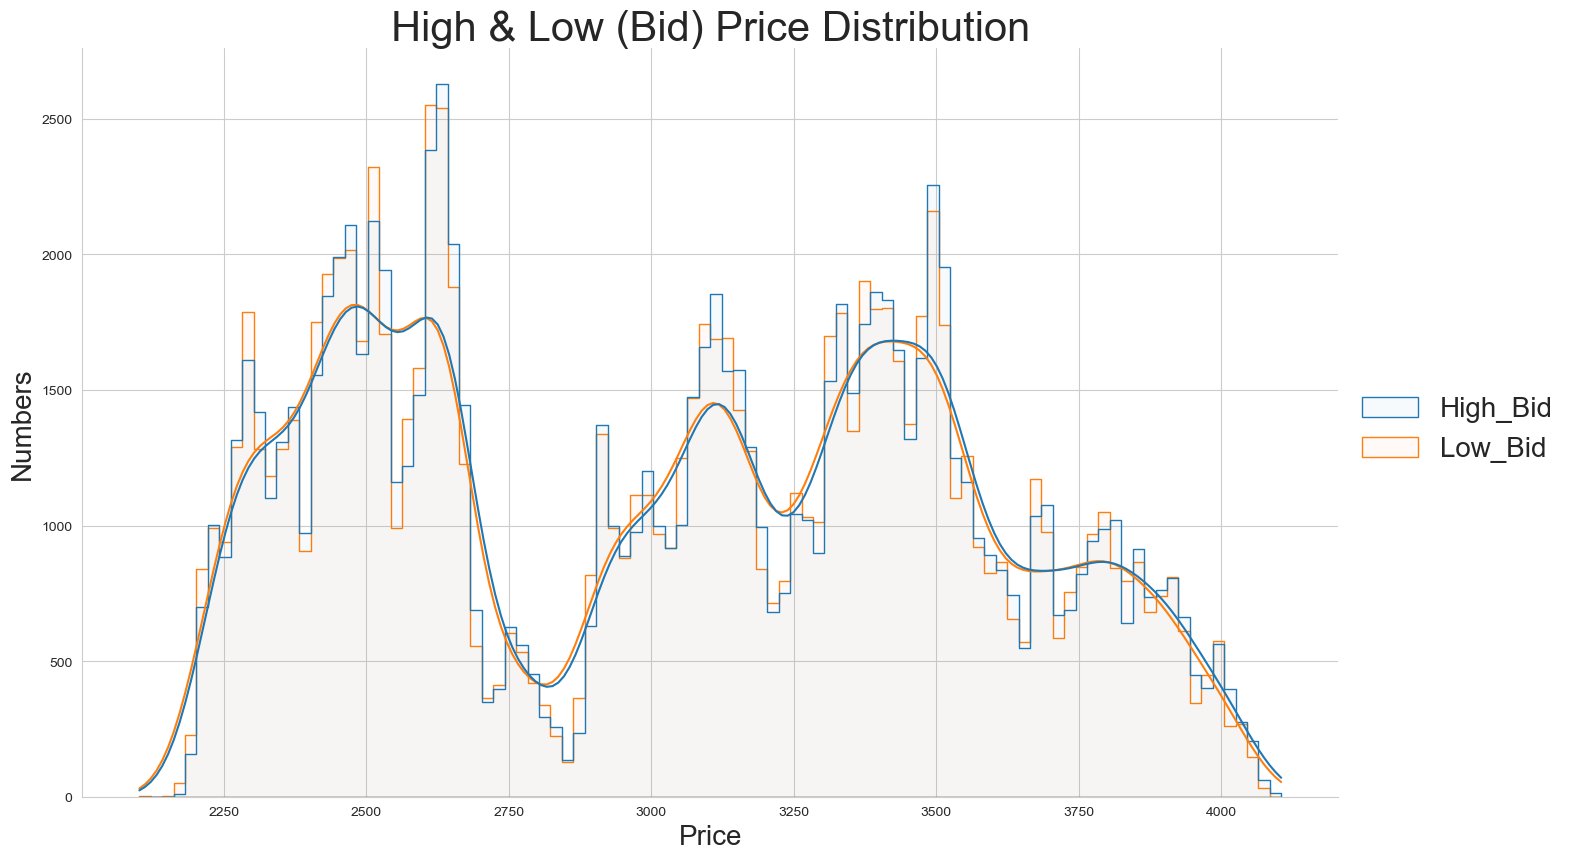

In [20]:
#Ask and Bid Price Distribution
import seaborn as sns

fig = plt.figure(figsize=(9, 4))
plt.rc('axes', titlesize= 30 )
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0})

sns.displot(
            data[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species",
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,

)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show();

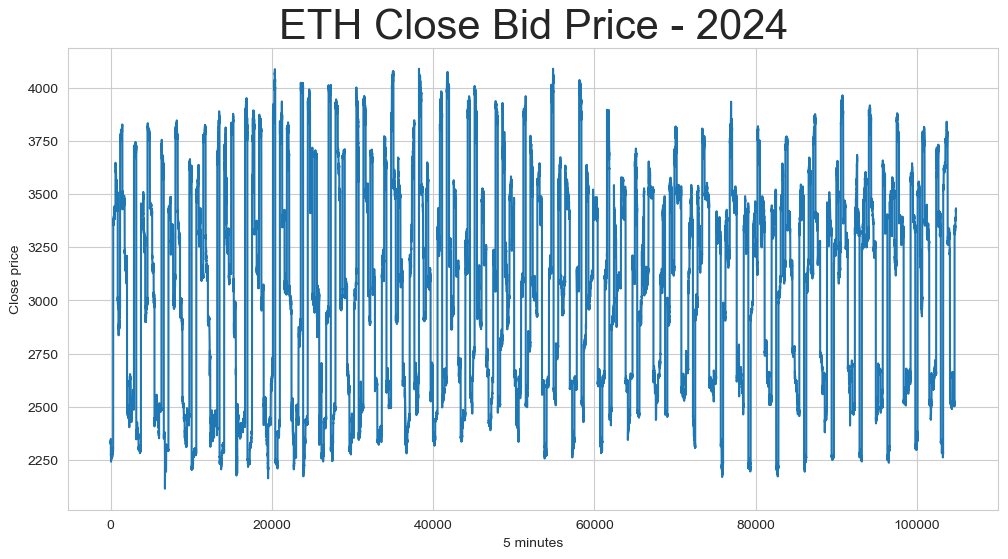

In [21]:
#visualise Close Bid Price
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('ETH Close Bid Price - 2024')
plt.xlabel('5 minutes')
plt.ylabel('Close price')
plt.show()

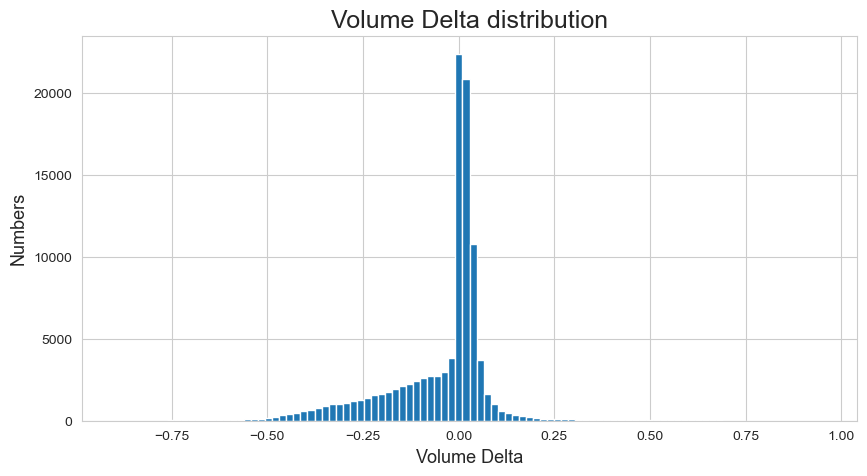

In [22]:
#visualise Volume Delta
plt.figure(num=1,figsize=(10,5))
plt.hist(data['Volume_Delta'],bins=100)
plt.title('Volume Delta distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Volume Delta',size=13)
plt.show();

In [23]:
#confirm the merged data
print("Merged DataFrame columns:", data.columns)

Merged DataFrame columns: Index(['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
       'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
       'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta',
       'Low_Delta', 'Close_Delta', 'Local time cleaned', 'Local_time_T'],
      dtype='object')


In [24]:
#Create additional features
data['Spread'] = data['Close_Ask'] - data['Close_Bid']
data['Mid_Price'] = (data['Close_Ask'] + data['Close_Bid']) / 2
data['Price_Change'] = (data['Close_Bid'] - data['Open_Bid']) / data['Open_Bid']

In [25]:
#Scale the price data (dividing by 1000)
price_cols_ask = ['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask']
price_cols_bid = ['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid']

data[price_cols_ask] = data[price_cols_ask] / 1000
data[price_cols_bid] = data[price_cols_bid] / 1000

In [26]:
#Define volume features
data['Volume_Delta'] = data['Volume_Ask'] - data['Volume_Bid']
data['Volume_Delta_abs'] = data['Volume_Delta'].abs()
data['Open_Delta'] = data['Open_Ask'] - data['Open_Bid']
data['High_Delta'] = data['High_Ask'] - data['High_Bid']
data['Low_Delta'] = data['Low_Ask'] - data['Low_Bid']
data['Close_Delta'] = data['Close_Ask'] - data['Close_Bid']

In [27]:
#add ASK and Bid values for time step
data['Y_High_Bid'] = data['High_Bid'].shift(-1)
data['Y_Low_Ask'] = data['Low_Ask'].shift(-1)

In [28]:
#Check for missing values 
data.dropna(inplace=True)

In [29]:
#labels for classification
data['Label_Ask'] = (data['Close_Ask'].shift(-1) > data['Close_Ask']).astype(int)
data['Label_Bid'] = (data['Close_Bid'].shift(-1) > data['Close_Bid']).astype(int)

In [30]:
#Normalize volume data
volume_cols = ['Volume_Bid', 'Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta', 
               'Low_Delta', 'Close_Delta', 'Y_High_Bid', 'Y_Low_Ask']

In [31]:
scaler = MinMaxScaler()
# Normalize only the columns that exist in the dataframe
data[volume_cols] = scaler.fit_transform(data[volume_cols])

In [32]:
#scaling and normalization 
print("Scaled and Normalized Merged Dataset:")
print(data.head())

Scaled and Normalized Merged Dataset:
   Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid  Open_Ask  High_Ask  \
0     2.338     2.341    2.336      2.340    0.049174     2.338     2.347   
1     2.341     2.343    2.338      2.339    0.051401     2.346     2.349   
2     2.339     2.340    2.338      2.338    0.025979     2.345     2.346   
3     2.338     2.338    2.337      2.337    0.030865     2.344     2.345   
4     2.337     2.338    2.334      2.335    0.047319     2.344     2.344   

   Low_Ask  Close_Ask  Volume_Ask  ...  Close_Delta       Local time cleaned  \
0    2.338      2.346    0.037669  ...          0.6  01.01.2024 21:00:00.000   
1    2.345      2.345    0.039896  ...          0.6  01.01.2024 21:05:00.000   
2    2.344      2.344    0.020226  ...          0.6  01.01.2024 21:10:00.000   
3    2.343      2.343    0.016051  ...          0.6  01.01.2024 21:15:00.000   
4    2.341      2.341    0.035211  ...          0.6  01.01.2024 21:20:00.000   

         Local_tim

In [33]:
#Candlestick Pattern detection
import numpy as np

def bullish_engulfing(data):
    return (data['Close_Bid'].shift(1) < data['Open_Bid'].shift(1)) & (data['Close_Bid'] > data['Open_Bid']) & (data['Open_Bid'] < data['Close_Bid'].shift(1))

def bearish_engulfing(data):
    return (data['Close_Bid'].shift(1) > data['Open_Bid'].shift(1)) & (data['Close_Bid'] < data['Open_Bid']) & (data['Open_Bid'] > data['Close_Bid'].shift(1))

def morning_star(data):
    return (data['Close_Bid'].shift(2) < data['Open_Bid'].shift(2)) & (data['Close_Bid'].shift(1) < data['Open_Bid'].shift(1)) & (data['Close_Bid'] > data['Open_Bid'])

def evening_star(data):
    return (data['Close_Bid'].shift(2) > data['Open_Bid'].shift(2)) & (data['Close_Bid'].shift(1) > data['Open_Bid'].shift(1)) & (data['Close_Bid'] < data['Open_Bid'])

def hammer(data):
    body = np.abs(data['Close_Bid'] - data['Open_Bid'])
    upper_shadow = data['High_Bid'] - np.maximum(data['Close_Bid'], data['Open_Bid'])
    lower_shadow = np.minimum(data['Close_Bid'], data['Open_Bid']) - data['Low_Bid']
    return (body <= 0.3 * (data['High_Bid'] - data['Low_Bid'])) & (lower_shadow >= 2 * body)

def shooting_star(data):
    body = np.abs(data['Close_Bid'] - data['Open_Bid'])
    upper_shadow = data['High_Bid'] - np.maximum(data['Close_Bid'], data['Open_Bid'])
    lower_shadow = np.minimum(data['Close_Bid'], data['Open_Bid']) - data['Low_Bid']
    return (body <= 0.3 * (data['High_Bid'] - data['Low_Bid'])) & (upper_shadow >= 2 * body)

In [34]:
#add patterns to dataframe
data['bullish_engulfing'] = bullish_engulfing(data).astype(int)
data['bearish_engulfing'] = bearish_engulfing(data).astype(int)
data['morning_star'] = morning_star(data).astype(int)
data['evening_star'] = evening_star(data).astype(int)
data['hammer'] = hammer(data).astype(int)
data['shooting_star'] = shooting_star(data).astype(int)

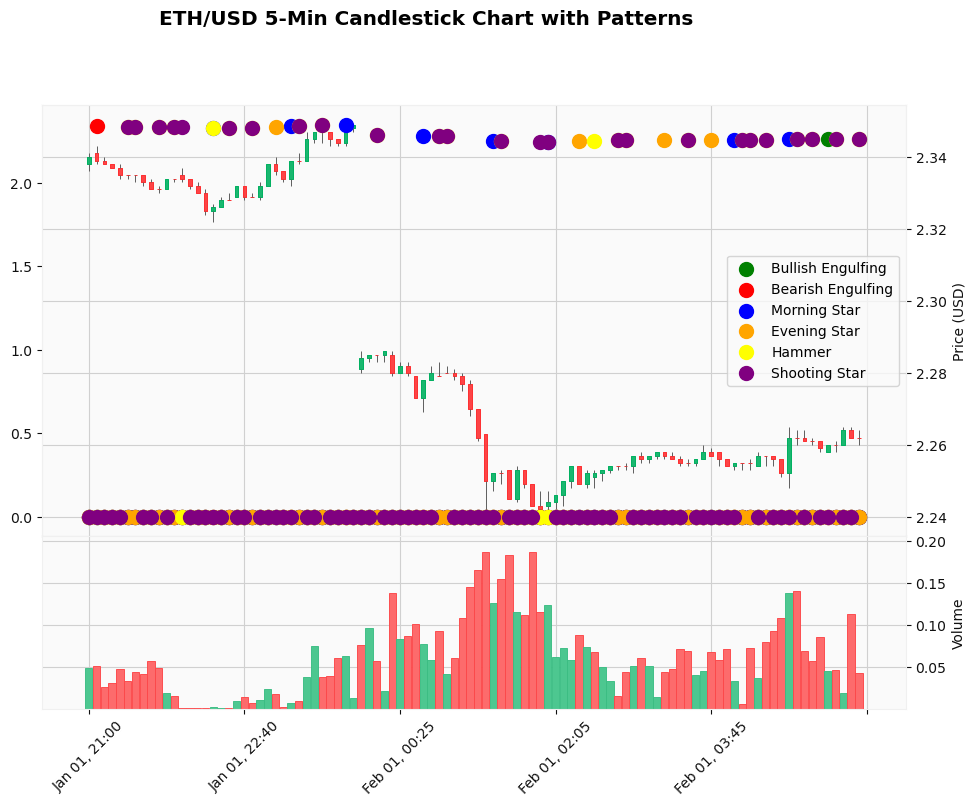

In [35]:
#Visualise Candlestick patterns
df_plot = data.iloc[:100].copy()
df_plot.set_index('Local_time_T', inplace=True)

addplots = []
if 'bullish_engulfing' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['bullish_engulfing'], type='scatter', markersize=100, marker='o', color='green', label='Bullish Engulfing'))
if 'bearish_engulfing' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['bearish_engulfing'], type='scatter', markersize=100, marker='o', color='red', label='Bearish Engulfing'))
if 'morning_star' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['morning_star'], type='scatter', markersize=100, marker='o', color='blue', label='Morning Star'))
if 'evening_star' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['evening_star'], type='scatter', markersize=100, marker='o', color='orange', label='Evening Star'))
if 'hammer' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['hammer'], type='scatter', markersize=100, marker='o', color='yellow', label='Hammer'))
if 'shooting_star' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['shooting_star'], type='scatter', markersize=100, marker='o', color='purple', label='Shooting Star'))

df_plot = df_plot.rename(columns={
    'Open_Bid': 'Open',
    'High_Bid': 'High',
    'Low_Bid': 'Low',
    'Close_Bid': 'Close',
    'Volume_Bid': 'Volume'  
})

mpf.plot(
    df_plot,
    type='candle',
    style='yahoo',
    title='ETH/USD 5-Min Candlestick Chart with Patterns',
    ylabel='Price (USD)',
    volume=True,
    addplot=addplots,
    figscale=1.5,
    show_nontrading=False
)

plt.show()

In [36]:
#1 day period for 1st January 2024
data['Local_time_T'] = pd.to_datetime(data['Local_time_T'], utc=True)

start_date = pd.to_datetime('2024-01-01 00:00:00+00:00', utc=True)
end_date = pd.to_datetime('2024-01-01 23:55:00+00:00', utc=True)
df_day = data[(data['Local_time_T'] >= start_date) & (data['Local_time_T'] <= end_date)].copy()

print("Jan 1, 2024 (checking bullish_engulfing):")
print(df_day[['Local_time_T', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'bullish_engulfing']].head(10))

Jan 1, 2024 (checking bullish_engulfing):
               Local_time_T  Open_Bid  High_Bid  Low_Bid  Close_Bid  \
0 2024-01-01 21:00:00+00:00     2.338     2.341    2.336      2.340   
1 2024-01-01 21:05:00+00:00     2.341     2.343    2.338      2.339   
2 2024-01-01 21:10:00+00:00     2.339     2.340    2.338      2.338   
3 2024-01-01 21:15:00+00:00     2.338     2.338    2.337      2.337   
4 2024-01-01 21:20:00+00:00     2.337     2.338    2.334      2.335   
5 2024-01-01 21:25:00+00:00     2.335     2.335    2.334      2.335   
6 2024-01-01 21:30:00+00:00     2.335     2.335    2.333      2.335   
7 2024-01-01 21:35:00+00:00     2.335     2.335    2.332      2.333   
8 2024-01-01 21:40:00+00:00     2.333     2.334    2.331      2.331   
9 2024-01-01 21:45:00+00:00     2.331     2.332    2.330      2.331   

   bullish_engulfing  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5                  0  
6              

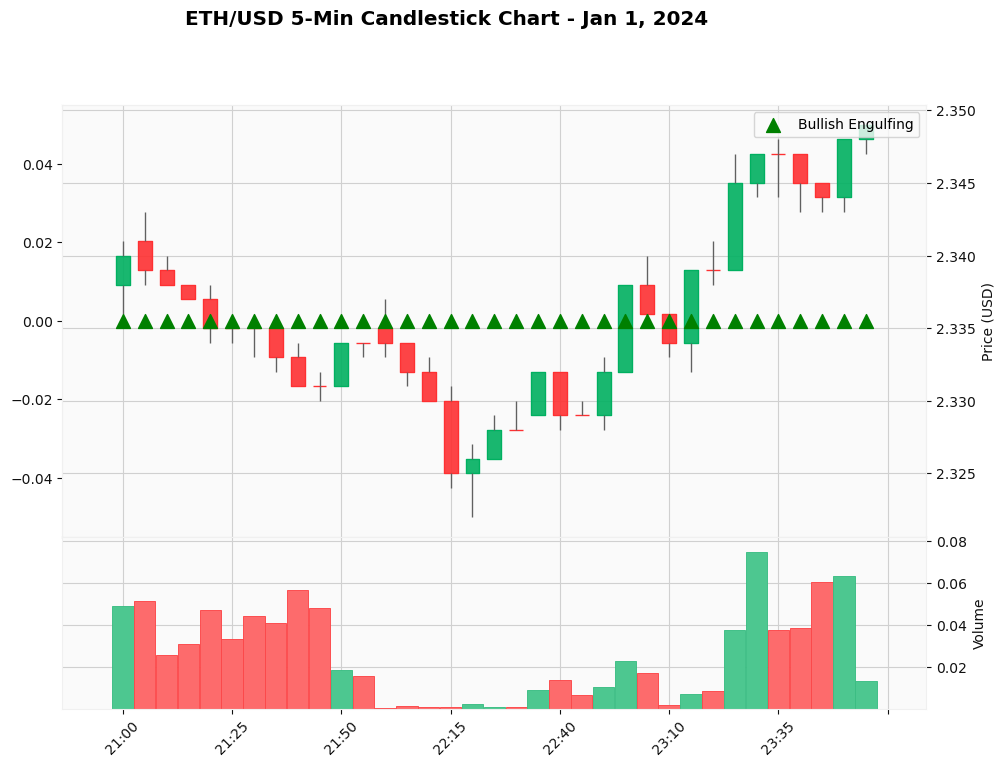

In [37]:
#Visualise for 1st jan bullish engulfing
df_plot = df_day.set_index('Local_time_T') 
addplots = []
if 'bullish_engulfing' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['bullish_engulfing'], type='scatter', markersize=100, marker='^', color='green', label='Bullish Engulfing'))
df_plot.columns = df_plot.columns.str.strip()

df_plot = df_plot.rename(columns={
    'Open_Bid': 'Open',
    'High_Bid': 'High',
    'Low_Bid': 'Low',
    'Close_Bid': 'Close',
    'Volume_Bid': 'Volume'
})

mpf.plot(
    df_plot,
    type='candle',
    style='yahoo',
    title='ETH/USD 5-Min Candlestick Chart - Jan 1, 2024',
    ylabel='Price (USD)',
    volume=True,
    addplot=addplots,
    figscale=1.5,
    show_nontrading=False
)
plt.show()

In [41]:
#pattern detection in dataframe
print(data[['Local_time_T', 'bullish_engulfing', 'bearish_engulfing', 'morning_star', 'evening_star', 'hammer', 'shooting_star']].head())

               Local_time_T  bullish_engulfing  bearish_engulfing  \
0 2024-01-01 21:00:00+00:00                  0                  0   
1 2024-01-01 21:05:00+00:00                  0                  1   
2 2024-01-01 21:10:00+00:00                  0                  0   
3 2024-01-01 21:15:00+00:00                  0                  0   
4 2024-01-01 21:20:00+00:00                  0                  0   

   morning_star  evening_star  hammer  shooting_star  
0             0             0       0              0  
1             0             0       0              0  
2             0             0       0              0  
3             0             0       0              0  
4             0             0       0              0  


In [42]:
#extract the date from formatted timestamp
data["Local_time_T"] = pd.to_datetime(data["Local_time_T"])
data["date"] = data["Local_time_T"].dt.date

In [43]:
#Technical Indicators
#Moving Averages
data['MA_10'] = data['Close_Bid'].rolling(window=10, min_periods=1).mean().round(2)
data['MA_20'] = data['Close_Bid'].rolling(window=20, min_periods=1).mean().round(2)
data['MA_50'] = data['Close_Bid'].rolling(window=50, min_periods=1).mean().round(2)

data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,...,bullish_engulfing,bearish_engulfing,morning_star,evening_star,hammer,shooting_star,date,MA_10,MA_20,MA_50
0,2.338,2.341,2.336,2.340,0.049174,2.338,2.347,2.338,2.346,0.037669,...,0,0,0,0,0,0,2024-01-01,2.34,2.34,2.34
1,2.341,2.343,2.338,2.339,0.051401,2.346,2.349,2.345,2.345,0.039896,...,0,1,0,0,0,0,2024-01-01,2.34,2.34,2.34
2,2.339,2.340,2.338,2.338,0.025979,2.345,2.346,2.344,2.344,0.020226,...,0,0,0,0,0,0,2024-01-01,2.34,2.34,2.34
3,2.338,2.338,2.337,2.337,0.030865,2.344,2.345,2.343,2.343,0.016051,...,0,0,0,0,0,0,2024-01-01,2.34,2.34,2.34
4,2.337,2.338,2.334,2.335,0.047319,2.344,2.344,2.341,2.341,0.035211,...,0,0,0,0,0,0,2024-01-01,2.34,2.34,2.34


In [44]:
print(data.columns)


Index(['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
       'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
       'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta',
       'Low_Delta', 'Close_Delta', 'Local time cleaned', 'Local_time_T',
       'Spread', 'Mid_Price', 'Price_Change', 'Y_High_Bid', 'Y_Low_Ask',
       'Label_Ask', 'Label_Bid', 'bullish_engulfing', 'bearish_engulfing',
       'morning_star', 'evening_star', 'hammer', 'shooting_star', 'date',
       'MA_10', 'MA_20', 'MA_50'],
      dtype='object')


In [45]:
#Percentage Change for Volatility 
data['Pct_Change_5min'] = data['Close_Bid'].pct_change(5).abs()

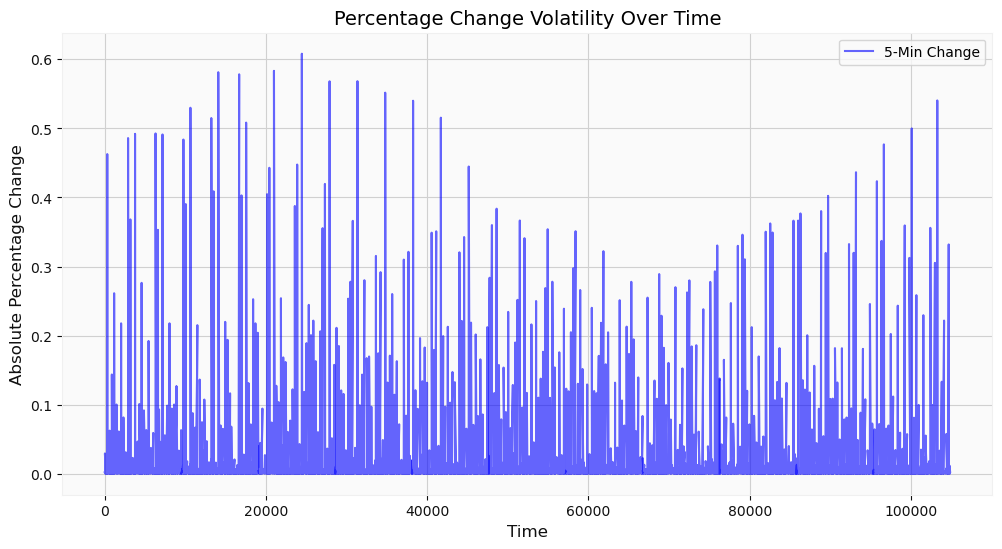

In [46]:
#Plot Volatility
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Pct_Change_5min'], label='5-Min Change', color='blue', alpha=0.6)
plt.title("Percentage Change Volatility Over Time", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Absolute Percentage Change", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Mike\AppData\Local\Temp\ipykernel_18272\2269241940.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


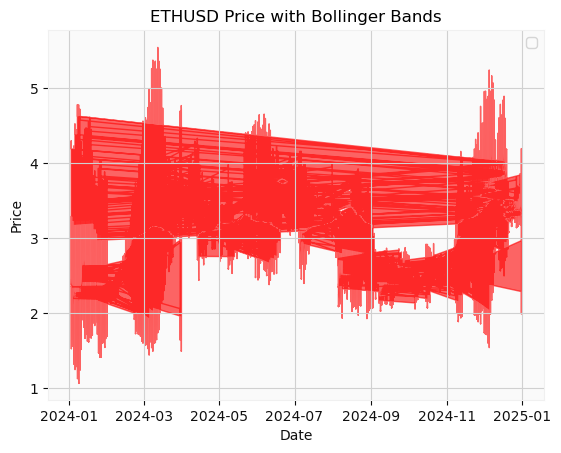

In [47]:
#Bollinger Bands
data['bollinger_upper'] = data['MA_10'] + (data['Close_Bid'].rolling(window=20).std() * 2)
data['bollinger_lower'] = data['MA_50'] - (data['Close_Bid'].rolling(window=50).std() * 2)
plt.fill_between(data['Local_time_T'], data['bollinger_upper'], data['bollinger_lower'], color='Red', alpha=0.6)

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ETHUSD Price with Bollinger Bands")
plt.legend()
plt.show()

In [48]:
#Bollinger Bands
data['MA_20'] = data['Close_Bid'].rolling(window=20).mean()
data['BB_std'] = data['Close_Bid'].rolling(window=20).std()
data['BB_upper'] = data['MA_20'] + (data['BB_std'] * 2)
data['BB_lower'] = data['MA_20'] - (data['BB_std'] * 2)

In [49]:
#Filter last day
import pandas as pd
from ta.volatility import BollingerBands
last_day_date = data['Local_time_T'].max().normalize()

one_day_data = data[data['Local_time_T'].dt.date == last_day_date.date()]
bb = BollingerBands(close=one_day_data['Close_Bid'], window=20, window_dev=2)

one_day_data['BB_Middle'] = bb.bollinger_mavg()
one_day_data['BB_Upper'] = bb.bollinger_hband()
one_day_data['BB_Lower'] = bb.bollinger_lband()

C:\Users\Mike\AppData\Local\Temp\ipykernel_18272\4144436213.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_day_data['BB_Middle'] = bb.bollinger_mavg()
C:\Users\Mike\AppData\Local\Temp\ipykernel_18272\4144436213.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_day_data['BB_Upper'] = bb.bollinger_hband()
C:\Users\Mike\AppData\Local\Temp\ipykernel_18272\4144436213.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

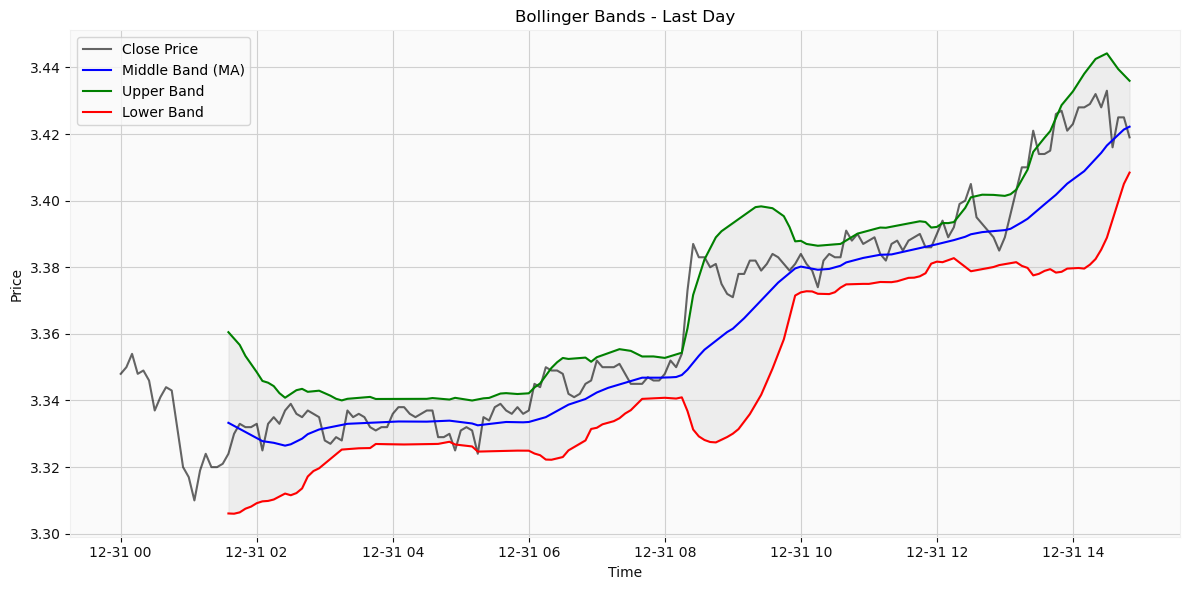

In [50]:
#Visualise
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(one_day_data['Local_time_T'], one_day_data['Close_Bid'], label='Close Price', color='black', alpha=0.6)
plt.plot(one_day_data['Local_time_T'], one_day_data['BB_Middle'], label='Middle Band (MA)', color='blue')
plt.plot(one_day_data['Local_time_T'], one_day_data['BB_Upper'], label='Upper Band', color='green')
plt.plot(one_day_data['Local_time_T'], one_day_data['BB_Lower'], label='Lower Band', color='red')

plt.fill_between(one_day_data['Local_time_T'],
                 one_day_data['BB_Lower'],
                 one_day_data['BB_Upper'],
                 color='gray', alpha=0.1)

plt.title('Bollinger Bands - Last Day')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# ATR (Volatility)
#data['ATR'] = data['Open_Bid'].rolling(window=14).max() - data['Close_Bid'].rolling(window=14).min()

In [52]:
#ATR
data['TR'] = np.maximum(data['High_Bid'] - data['Low_Bid'], 
                        np.maximum(abs(data['High_Bid'] - data['Close_Bid'].shift(1)), 
                                   abs(data['Low_Bid'] - data['Close_Bid'].shift(1))))
data['ATR'] = data['TR'].rolling(window=14).mean()

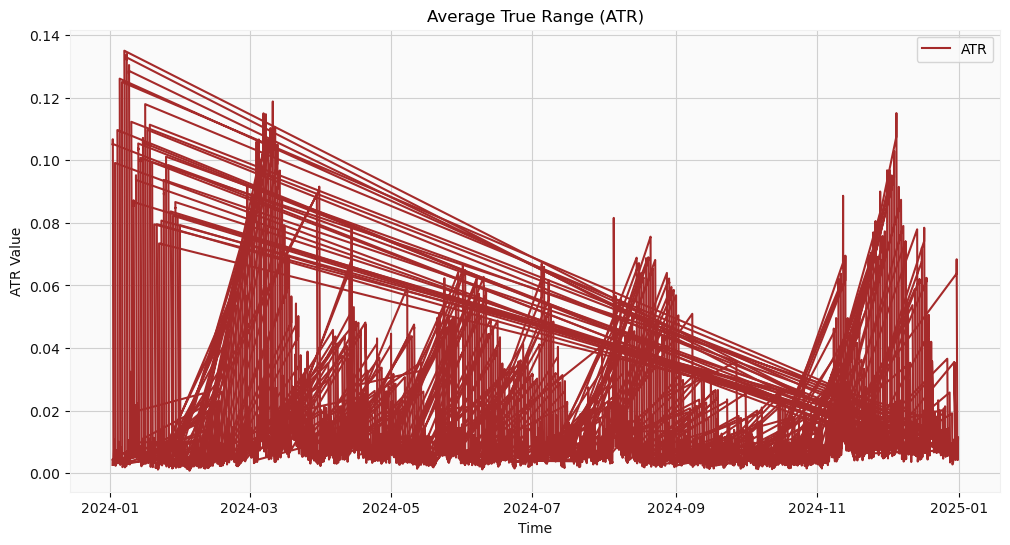

In [53]:
#Plot ATR (Average True Range)
plt.figure(figsize=(12, 6))
plt.plot(data['Local_time_T'], data['ATR'], label='ATR', color='brown')
plt.title('Average True Range (ATR)')
plt.xlabel('Time')
plt.ylabel('ATR Value')
plt.legend()
plt.show()

In [54]:
# EMA
data['EMA_10'] = data['Close_Bid'].ewm(span=10, adjust=False).mean()

In [55]:
#filter last day
import pandas as pd
last_day = one_day_data['Local_time_T'].max().normalize()
one_day_data = one_day_data[one_day_data['Local_time_T'].dt.date == last_day.date()]

one_day_data['EMA_10'] = one_day_data['Close_Bid'].ewm(span=10, adjust=False).mean()
one_day_data['EMA_20'] = one_day_data['Close_Bid'].ewm(span=20, adjust=False).mean()
one_day_data['EMA_50'] = one_day_data['Close_Bid'].ewm(span=50, adjust=False).mean()

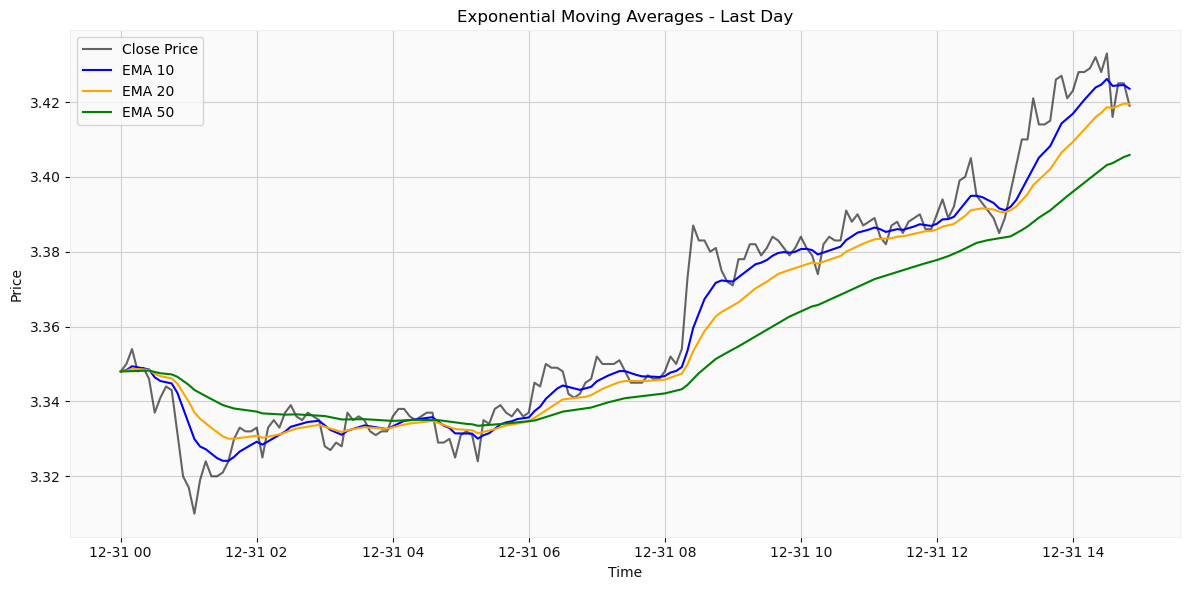

In [56]:
#Visualise
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(one_day_data['Local_time_T'], one_day_data['Close_Bid'], label='Close Price', color='black', alpha=0.6)
plt.plot(one_day_data['Local_time_T'], one_day_data['EMA_10'], label='EMA 10', color='blue')
plt.plot(one_day_data['Local_time_T'], one_day_data['EMA_20'], label='EMA 20', color='orange')
plt.plot(one_day_data['Local_time_T'], one_day_data['EMA_50'], label='EMA 50', color='green')

plt.title('Exponential Moving Averages - Last Day')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
#MACD
short_ema = data['Close_Bid'].ewm(span=12, adjust=False).mean()
long_ema = data['Close_Bid'].ewm(span=26, adjust=False).mean()
data['MACD'] = short_ema - long_ema
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['MACD_Signal']

C:\Users\Mike\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


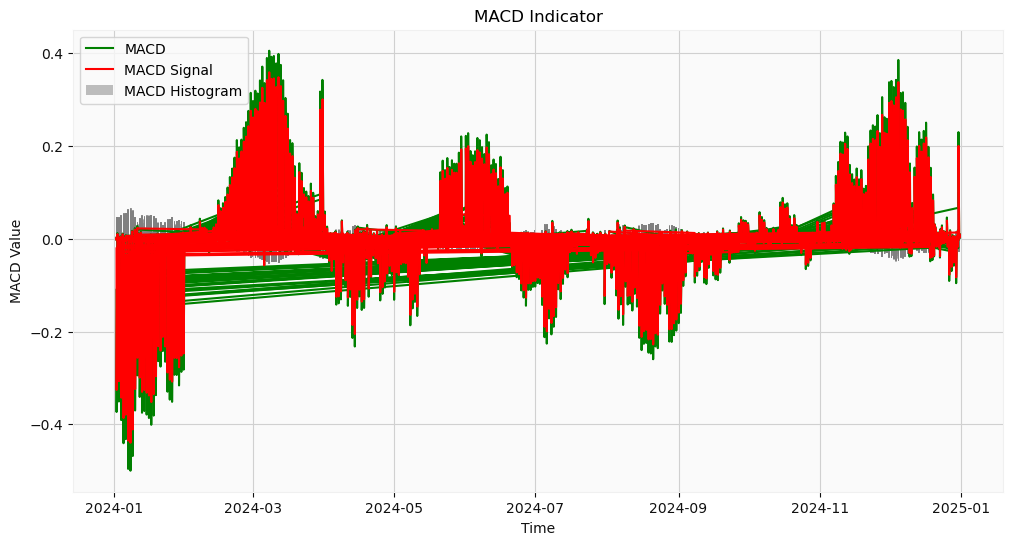

In [58]:
#Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(data['Local_time_T'], data['MACD'], label='MACD', color='green')
plt.plot(data['Local_time_T'], data['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(data['Local_time_T'], data['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('MACD Indicator')
plt.xlabel('Time')
plt.ylabel('MACD Value')
plt.legend()
plt.show()

In [59]:
#Filter last day
import pandas as pd
from ta.trend import MACD
last_day = one_day_data['Local_time_T'].max().normalize()
one_day_data = one_day_data[one_day_data['Local_time_T'].dt.date == last_day.date()]

macd = MACD(
    close=one_day_data['Close_Bid'],
    window_slow=26,
    window_fast=12,
    window_sign=9
)

one_day_data['MACD'] = macd.macd()
one_day_data['MACD_signal'] = macd.macd_signal()
one_day_data['MACD_histogram'] = macd.macd_diff()

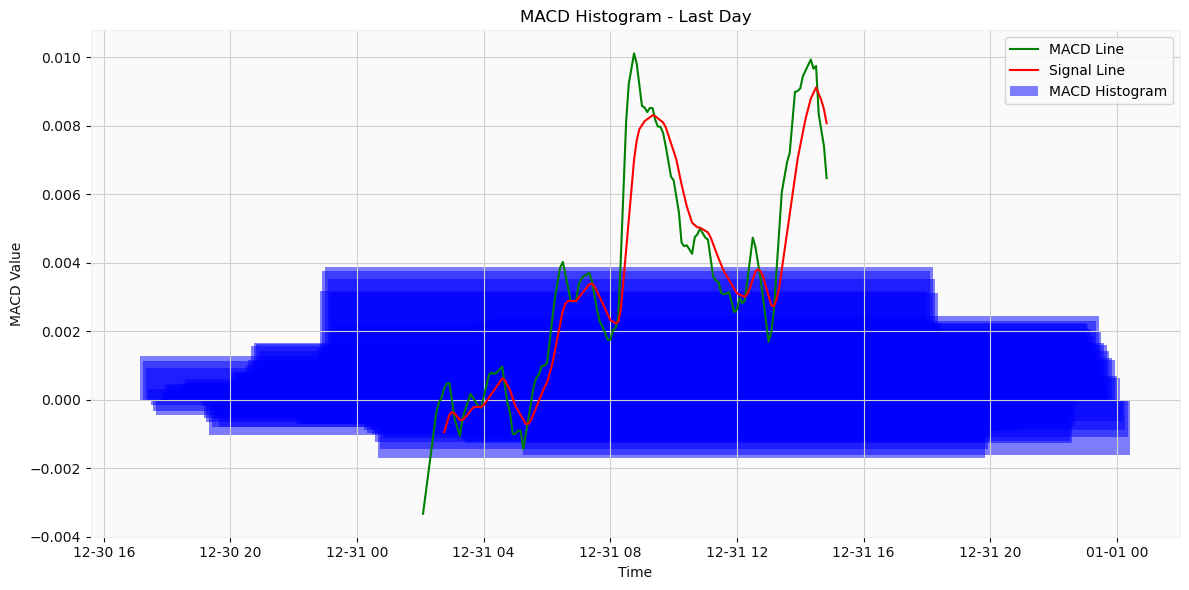

In [60]:
#Visualise
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(one_day_data['Local_time_T'], one_day_data['MACD_histogram'], label='MACD Histogram', color='blue', alpha=0.5)
plt.plot(one_day_data['Local_time_T'], one_day_data['MACD'], label='MACD Line', color='green')
plt.plot(one_day_data['Local_time_T'], one_day_data['MACD_signal'], label='Signal Line', color='red')

plt.title('MACD Histogram - Last Day')
plt.xlabel('Time')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
#Alligator Indicator
data['Jaw'] = data['Close_Bid'].rolling(window=13).mean()
data['Teeth'] = data['Close_Bid'].rolling(window=8).mean()
data['Lips'] = data['Close_Bid'].rolling(window=5).mean()

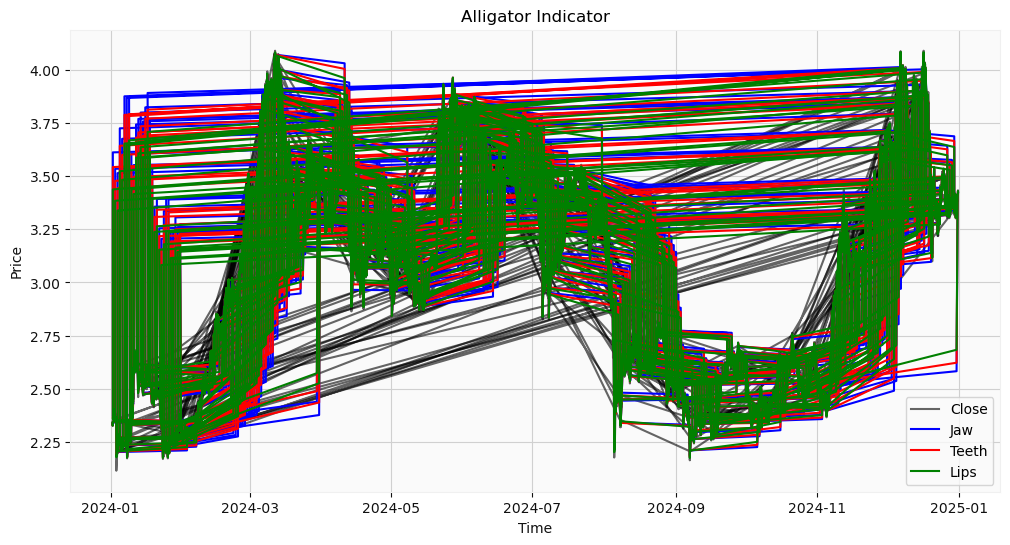

In [62]:
#Plot Alligator Indicator
plt.figure(figsize=(12, 6))
plt.plot(data['Local_time_T'], data['Close_Bid'], label='Close', color='black', alpha=0.6)
plt.plot(data['Local_time_T'], data['Jaw'], label='Jaw', color='blue')
plt.plot(data['Local_time_T'], data['Teeth'], label='Teeth', color='red')
plt.plot(data['Local_time_T'], data['Lips'], label='Lips', color='green')
plt.title('Alligator Indicator')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [63]:
#filter last day
last_day = one_day_data['Local_time_T'].max().normalize()
one_day_data = one_day_data[one_day_data['Local_time_T'].dt.date == last_day.date()].copy()
def smma(series, period):
    return series.ewm(alpha=1/period, adjust=False).mean()

one_day_data['Jaw'] = smma(one_day_data['Close_Bid'], 13).shift(8)
one_day_data['Teeth'] = smma(one_day_data['Close_Bid'], 8).shift(5)
one_day_data['Lips'] = smma(one_day_data['Close_Bid'], 5).shift(3)

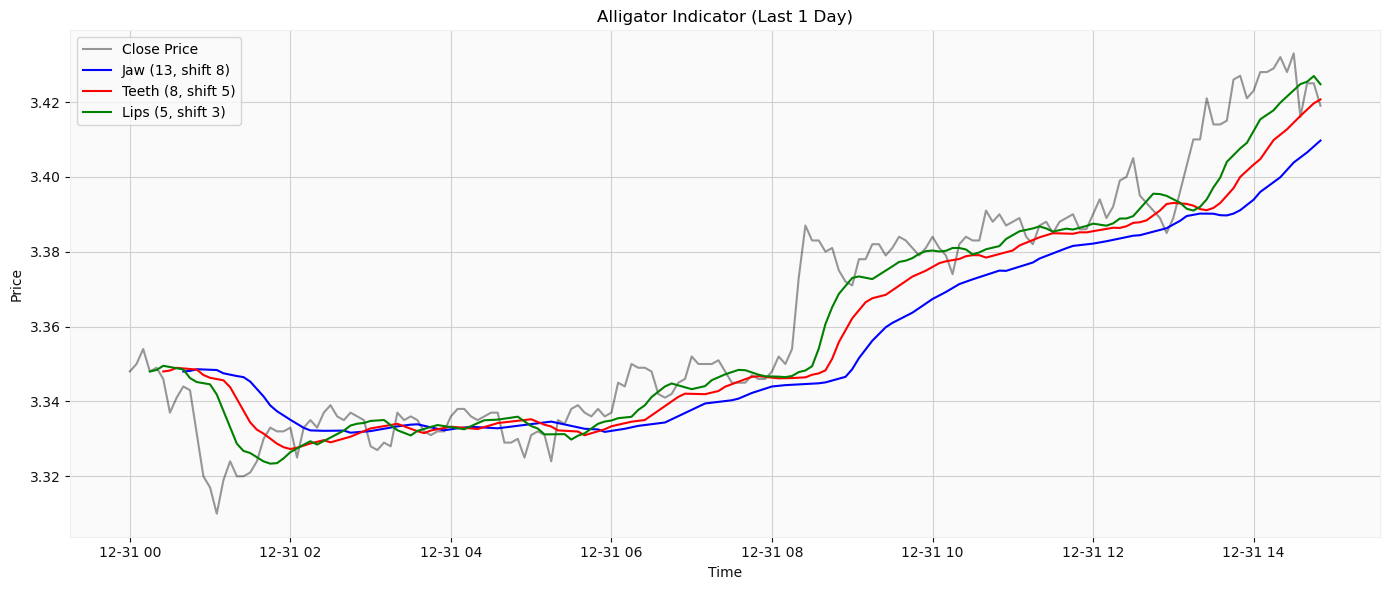

In [64]:
#Visualise
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(one_day_data['Local_time_T'], one_day_data['Close_Bid'], label='Close Price', color='black', alpha=0.4)
plt.plot(one_day_data['Local_time_T'], one_day_data['Jaw'], label='Jaw (13, shift 8)', color='blue')
plt.plot(one_day_data['Local_time_T'], one_day_data['Teeth'], label='Teeth (8, shift 5)', color='red')
plt.plot(one_day_data['Local_time_T'], one_day_data['Lips'], label='Lips (5, shift 3)', color='green')

plt.title('Alligator Indicator (Last 1 Day)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras_tuner as kt
import tensorflow as tf
import datetime
import warnings
warnings.filterwarnings('ignore')

In [66]:
#Volume Moving Average
data['vol_ma'] = data['Volume_Bid'].rolling(window=20).mean()

In [67]:
#Define Target
# 1 for Long (bullish), 0 for Short (bearish)
data['Market_Direction'] = np.where(data['bullish_engulfing'] | data['morning_star'] | data['hammer'], 1, 
                                   np.where(data['bearish_engulfing'] | data['evening_star'] | data['shooting_star'], 0, np.nan))
data['Market_Direction'] = data['Market_Direction'].ffill().bfill()

In [68]:
#Drop NaN values
data.dropna(inplace=True)

In [69]:
print(f"Data shape after preprocessing: {data.shape}")

Data shape after preprocessing: (104790, 52)


In [70]:
#Feature Selection 
features = [
    'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
    'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
    'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
    'MA_10', 'MA_20', 'MA_50', 'BB_upper', 'BB_lower', 'ATR', 'EMA_10', 'MACD', 'MACD_Signal',
    'Jaw', 'Teeth', 'Lips', 'vol_ma', 'bullish_engulfing', 'bearish_engulfing', 
    'morning_star', 'evening_star', 'hammer', 'shooting_star'
]

In [71]:
#Define X and y
X = data[features]
y = data['Market_Direction']

In [72]:
# Split data
train_size = int(len(data) * 0.8)
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

In [73]:
print(X_train.shape)
print(X_test.shape)

(83832, 35)
(20958, 35)


In [74]:
#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
#Sequences for time series
def create_sequences(X, y, time_steps=20):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [76]:
time_steps = 20
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, time_steps)

In [77]:
print(X_train_seq.shape)
print(y_train_seq.shape)

(83812, 20, 35)
(83812,)


In [78]:
#Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

In [79]:
#Earlystopping
#Model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint_cnn = ModelCheckpoint('best_cnn.h5', monitor='val_accuracy', save_best_only=True)
checkpoint_lstm = ModelCheckpoint('best_lstm.h5', monitor='val_accuracy', save_best_only=True)
checkpoint_cnn_lstm = ModelCheckpoint('best_cnn_lstm.h5', monitor='val_accuracy', save_best_only=True)
checkpoint_transformer = ModelCheckpoint('best_transformer.h5', monitor='val_accuracy', save_best_only=True)

In [222]:
# Support Vector Machine model
from sklearn.svm import SVC
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
svm_metrics = evaluate_model(y_test, y_pred_svm, "SVM")

SVM - Accuracy: 0.8406, Precision: 0.8696, Recall: 0.8406, F1-Score: 0.8179


In [224]:
# Logistic Regression mode
from sklearn.linear_model import LogisticRegressionl
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_lr_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
lr_metrics = evaluate_model(y_test, y_pred_lr, "Logistic Regression")

Logistic Regression - Accuracy: 0.8405, Precision: 0.8689, Recall: 0.8405, F1-Score: 0.8179


In [80]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_metrics = evaluate_model(y_test, y_pred_dt, "Decision Tree")

Decision Tree - Accuracy: 0.7629, Precision: 0.7688, Recall: 0.7629, F1-Score: 0.7654


In [81]:
#XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
xgb_metrics = evaluate_model(y_test, y_pred_xgb, "XGBoost")

XGBoost - Accuracy: 0.8350, Precision: 0.8470, Recall: 0.8350, F1-Score: 0.8161


In [82]:
#CNN with Keras Tuner
def build_cnn(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', 32, 128, step=32),
                     kernel_size=hp.Choice('kernel_size', [3, 5]),
                     activation='relu',
                     input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [83]:
#Hyperparameter tunning
tuner_cnn = kt.Hyperband(build_cnn, objective='val_accuracy', max_epochs=50, directory='cnn_tuner', project_name='cnn')
tuner_cnn.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_cnn = tuner_cnn.get_best_models(num_models=1)[0]
best_cnn.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
             callbacks=[early_stopping, checkpoint_cnn], verbose=1)
y_pred_cnn = (best_cnn.predict(X_test_seq) > 0.5).astype(int)
y_pred_cnn_proba = best_cnn.predict(X_test_seq).flatten()
cnn_metrics = evaluate_model(y_test_seq, y_pred_cnn.flatten(), "CNN")

Reloading Tuner from cnn_tuner\cnn\tuner0.json

Epoch 1/50
2612/2620 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7989 - loss: 0.4534

2620/2620 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7989 - loss: 0.4534 - val_accuracy: 0.8072 - val_loss: 0.4533
Epoch 2/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7949 - loss: 0.4546 - val_accuracy: 0.8035 - val_loss: 0.4486
Epoch 3/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7996 - loss: 0.4496 - val_accuracy: 0.7993 - val_loss: 0.4504
Epoch 4/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7979 - loss: 0.4518 - val_accuracy: 0.8049 - val_loss: 0.4492
Epoch 5/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8005 - loss: 0.4480 - val_accuracy: 0.8026 - val_loss: 0.4490
Epoch 6/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8002 - loss: 0.4494 - val_accuracy: 0.8046 - val_loss: 0.4506
Epoch 7/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8009 - loss: 0.4477 - val_accuracy: 0.8051 - val_loss: 0.4502
655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN - Accura

In [84]:
#LSTM with Keras Tuner
def build_lstm(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('lstm_units', 50, 200, step=50),
                   input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                   return_sequences=False))
    model.add(Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [85]:
#Hyperparameter tunning
tuner_lstm = kt.Hyperband(build_lstm, objective='val_accuracy', max_epochs=50, directory='lstm_tuner', project_name='lstm')
tuner_lstm.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_lstm = tuner_lstm.get_best_models(num_models=1)[0]
best_lstm.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
              callbacks=[early_stopping, checkpoint_lstm], verbose=1)
y_pred_lstm = (best_lstm.predict(X_test_seq) > 0.5).astype(int)
y_pred_lstm_proba = best_lstm.predict(X_test_seq).flatten()
lstm_metrics = evaluate_model(y_test_seq, y_pred_lstm.flatten(), "LSTM")

Trial 90 Complete [00h 05m 35s]
val_accuracy: 0.8109179735183716

Best val_accuracy So Far: 0.8122074604034424
Total elapsed time: 23h 01m 14s
Epoch 1/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8046 - loss: 0.4466

2620/2620 ━━━━━━━━━━━━━━━━━━━━ 65s 24ms/step - accuracy: 0.8046 - loss: 0.4466 - val_accuracy: 0.8099 - val_loss: 0.4408
Epoch 2/50
2619/2620 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8042 - loss: 0.4458

2620/2620 ━━━━━━━━━━━━━━━━━━━━ 61s 23ms/step - accuracy: 0.8042 - loss: 0.4458 - val_accuracy: 0.8102 - val_loss: 0.4439
Epoch 3/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 61s 23ms/step - accuracy: 0.8075 - loss: 0.4367 - val_accuracy: 0.8069 - val_loss: 0.4441
Epoch 4/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 62s 24ms/step - accuracy: 0.8081 - loss: 0.4327 - val_accuracy: 0.8053 - val_loss: 0.4476
Epoch 5/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 62s 24ms/step - accuracy: 0.8108 - loss: 0.4245 - val_accuracy: 0.8038 - val_loss: 0.4504
Epoch 6/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 61s 23ms/step - accuracy: 0.8160 - loss: 0.4097 - val_accuracy: 0.8046 - val_loss: 0.4519
655/655 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
LSTM - Accuracy: 0.8099, Precision: 0.8080, Recall: 0.8099, F1-Score: 0.8089


In [200]:
#CNN-LSTM with Keras Tuner
def build_cnn_lstm(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', 32, 128, step=32),
                     kernel_size=hp.Choice('kernel_size', [3, 5]),
                     activation='relu',
                     input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(hp.Int('lstm_units', 50, 200, step=50), return_sequences=False))
    model.add(Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [87]:
#Hyperparameter tunning
tuner_cnn_lstm = kt.Hyperband(build_cnn_lstm, objective='val_accuracy', max_epochs=50, directory='cnn_lstm_tuner', project_name='cnn_lstm')
tuner_cnn_lstm.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_cnn_lstm = tuner_cnn_lstm.get_best_models(num_models=1)[0]
best_cnn_lstm.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
                  callbacks=[early_stopping, checkpoint_cnn_lstm], verbose=1)
y_pred_cnn_lstm = (best_cnn_lstm.predict(X_test_seq) > 0.5).astype(int)
y_pred_cnn_lstm_proba = best_cnn_lstm.predict(X_test_seq).flatten()
cnn_lstm_metrics = evaluate_model(y_test_seq, y_pred_cnn_lstm.flatten(), "CNN-LSTM")

Trial 90 Complete [00h 07m 07s]
val_accuracy: 0.8100582957267761

Best val_accuracy So Far: 0.8112044930458069
Total elapsed time: 04h 31m 25s
Epoch 1/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8031 - loss: 0.4467

2620/2620 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step - accuracy: 0.8031 - loss: 0.4467 - val_accuracy: 0.8098 - val_loss: 0.4448
Epoch 2/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8049 - loss: 0.4467 - val_accuracy: 0.8067 - val_loss: 0.4483
Epoch 3/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.8029 - loss: 0.4434 - val_accuracy: 0.8074 - val_loss: 0.4478
Epoch 4/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8041 - loss: 0.4437 - val_accuracy: 0.8080 - val_loss: 0.4475
Epoch 5/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.8038 - loss: 0.4416 - val_accuracy: 0.8070 - val_loss: 0.4482
Epoch 6/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.8072 - loss: 0.4331 - val_accuracy: 0.8070 - val_loss: 0.4492
655/655 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
CNN-LSTM - Accuracy: 0.8098, Precision: 0.8092, Recall: 0.8098, F1-Score: 0.8095


In [88]:
#Vanilla Transformer
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)
    ffn = Sequential([
        Dense(ff_dim, activation='relu'),
        Dense(inputs.shape[-1])
    ])
    x = ffn(x)
    x = Dropout(dropout)(x)
    return LayerNormalization(epsilon=1e-6)(x + inputs)

In [89]:
def build_transformer(hp):
    inputs = Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
    x = inputs
    for _ in range(hp.Int('transformer_layers', 1, 3)):
        x = transformer_encoder(x, 
                               head_size=hp.Choice('head_size', [64, 128]),
                               num_heads=hp.Choice('num_heads', [2, 4]),
                               ff_dim=hp.Int('ff_dim', 128, 512, step=128),
                               dropout=hp.Float('dropout', 0.1, 0.5, step=0.1))
    x = Flatten()(x)
    x = Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu')(x)
    x = Dropout(hp.Float('dense_dropout', 0.1, 0.5, step=0.1))(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [90]:
#Hyperparameter tunning
tuner_transformer = kt.Hyperband(build_transformer, objective='val_accuracy', max_epochs=50, directory='transformer_tuner', project_name='transformer')
tuner_transformer.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_transformer = tuner_transformer.get_best_models(num_models=1)[0]
best_transformer.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
                    callbacks=[early_stopping, checkpoint_transformer], verbose=1)
y_pred_transformer = (best_transformer.predict(X_test_seq) > 0.5).astype(int)
y_pred_transformer_proba = best_transformer.predict(X_test_seq).flatten()
transformer_metrics = evaluate_model(y_test_seq, y_pred_transformer.flatten(), "Transformer")

Trial 90 Complete [01h 02m 26s]
val_accuracy: 0.8056643605232239

Best val_accuracy So Far: 0.8090553283691406
Total elapsed time: 15h 56m 43s
Epoch 1/50
2619/2620 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8007 - loss: 0.4531

2620/2620 ━━━━━━━━━━━━━━━━━━━━ 175s 63ms/step - accuracy: 0.8007 - loss: 0.4531 - val_accuracy: 0.8046 - val_loss: 0.4526
Epoch 2/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 164s 63ms/step - accuracy: 0.7955 - loss: 0.4590 - val_accuracy: 0.8037 - val_loss: 0.4511
Epoch 3/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 163s 62ms/step - accuracy: 0.7995 - loss: 0.4513 - val_accuracy: 0.8019 - val_loss: 0.4498
Epoch 4/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 163s 62ms/step - accuracy: 0.8054 - loss: 0.4447 - val_accuracy: 0.8017 - val_loss: 0.4528
Epoch 5/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 164s 63ms/step - accuracy: 0.8035 - loss: 0.4435 - val_accuracy: 0.8029 - val_loss: 0.4560
Epoch 6/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 165s 63ms/step - accuracy: 0.8051 - loss: 0.4384 - val_accuracy: 0.7986 - val_loss: 0.4564
Epoch 7/50
2620/2620 ━━━━━━━━━━━━━━━━━━━━ 164s 63ms/step - accuracy: 0.8082 - loss: 0.4339 - val_accuracy: 0.7964 - val_loss: 0.4594
Epoch 8/50
2619/2620 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8086 - loss

2620/2620 ━━━━━━━━━━━━━━━━━━━━ 164s 63ms/step - accuracy: 0.8086 - loss: 0.4327 - val_accuracy: 0.8051 - val_loss: 0.4606
655/655 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step
655/655 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step
Transformer - Accuracy: 0.8019, Precision: 0.7950, Recall: 0.8019, F1-Score: 0.7966


In [91]:
#save best model
best_model = tuner_lstm.get_best_models(num_models=1)[0]

In [92]:
print(best_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 200)            │       188,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,101 (855.86 KB)

 Trainable params: 219,101 (855.86 KB)

 Non-trainable params: 0 (0.00 B)

None


In [93]:
#Trailing Stop Simulation and Backtesting
def backtest_trailing_stop(df, model, scaler, features, threshold=0.5, stop_loss_pct=0.02, take_profit_pct=0.05):
    capital = 10000
    position = 0
    entry_price = 0
    trade_history = []
    df['trailing_stop'] = np.nan
    df['position'] = 0
    df['predicted_proba'] = np.nan

    for i in range(time_steps, len(df)):
        seq = df[features].iloc[i-time_steps:i].values
        seq_scaled = scaler.transform(seq)
        seq_scaled = seq_scaled.reshape(1, time_steps, len(features))
        
        if isinstance(model, (xgb.XGBClassifier, DecisionTreeClassifier)):
            pred_proba = model.predict_proba(seq_scaled[:, -1, :])[0][1]
        else:
            pred_proba = model.predict(seq_scaled, verbose=0)[0][0]
        
        df.loc[df.index[i], 'predicted_proba'] = pred_proba

        if pred_proba > threshold and position == 0:
            if df['bullish_engulfing'].iloc[i] == 1:
                position = capital / df['Close_Bid'].iloc[i]
                entry_price = df['Close_Bid'].iloc[i]
                stop_loss = entry_price * (1 - stop_loss_pct)
                trade_history.append({'entry': entry_price, 'stop_loss': stop_loss, 'profit': 0})
                df.loc[df.index[i], 'position'] = 1

        if position > 0:
            highest_price = df['High_Bid'].iloc[i-time_steps:i+1].max()
            df.loc[df.index[i], 'trailing_stop'] = max(df['trailing_stop'].iloc[i-1] if i > 0 else stop_loss, 
                                                      highest_price * (1 - stop_loss_pct))
            
            if df['Close_Bid'].iloc[i] <= df['trailing_stop'].iloc[i] or df['Close_Bid'].iloc[i] >= entry_price * (1 + take_profit_pct):
                exit_price = df['Close_Bid'].iloc[i]
                profit = (exit_price - entry_price) * position
                capital += profit
                trade_history[-1]['profit'] = profit
                trade_history.append({'entry': entry_price, 'exit': exit_price, 'profit': profit})
                print(f"Exit Long at {exit_price} on {df['Local_time_T'].iloc[i]} with PnL: {profit:.2f}")
                position = 0
                df.loc[df.index[i], 'position'] = 0

    total_profit = sum(trade['profit'] for trade in trade_history if 'profit' in trade)
    print(f"\nTotal Profit from Backtest: {total_profit:.2f} USD")
    return df, trade_history, capital

In [94]:
#Run backtest with best model 
data, trade_history, final_capital = backtest_trailing_stop(data, best_lstm, scaler, features)

Exit Long at 3.338 on 2024-03-01 00:00:00+00:00 with PnL: 4769.91
Exit Long at 3.628 on 2024-04-01 00:00:00+00:00 with PnL: 1135.47
Exit Long at 3.805 on 2024-06-01 15:30:00+00:00 with PnL: 799.00
Exit Long at 3.714 on 2024-12-01 00:00:00+00:00 with PnL: 1102.76
Exit Long at 3.889 on 2024-12-04 20:20:00+00:00 with PnL: 899.50
Exit Long at 4.07 on 2024-12-06 19:25:00+00:00 with PnL: 946.44

Total Profit from Backtest: 19306.15 USD


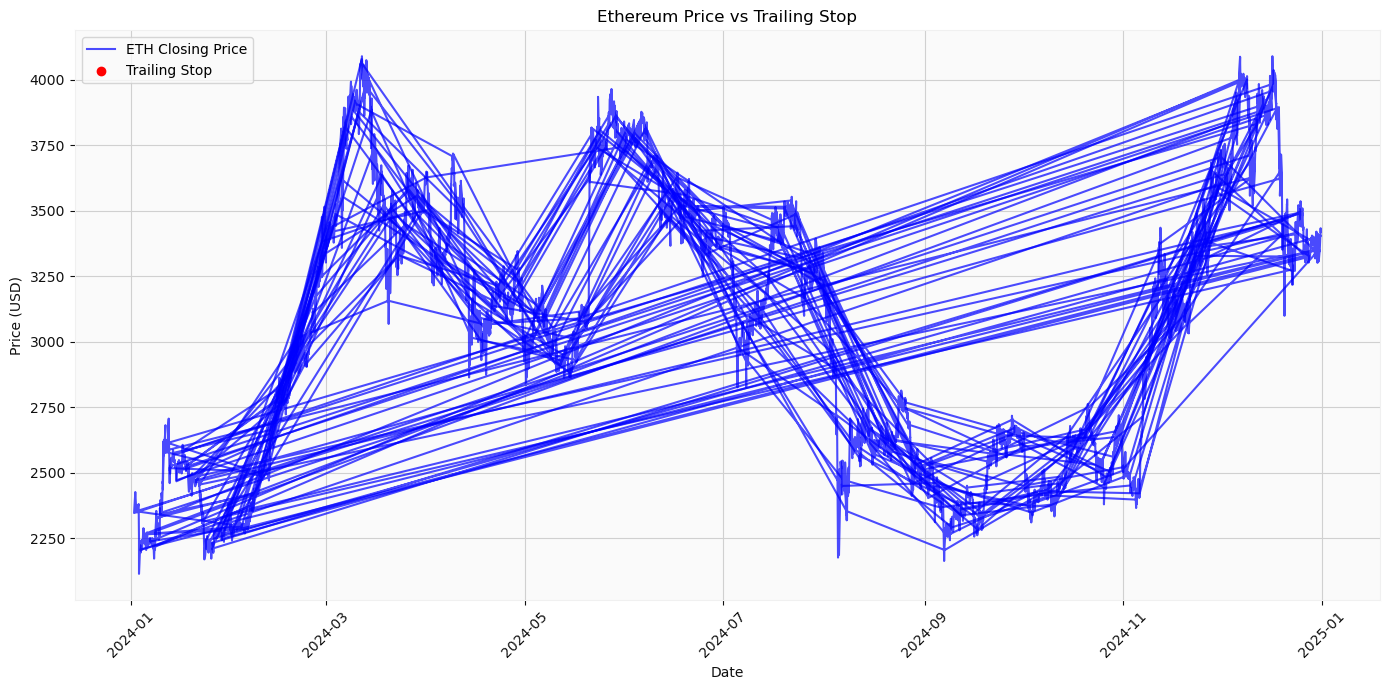

In [95]:
#Visualization for Trailing stop
def visualize_trailing_stop(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Local_time_T'], df['Close_Bid'] * 1000, label='ETH Closing Price', color='blue', alpha=0.7)
    trailing_stop_points = df[df['trailing_stop'].notnull()]
    plt.scatter(trailing_stop_points['Local_time_T'], trailing_stop_points['trailing_stop'] * 1000, 
                color='red', label='Trailing Stop', zorder=5)
    plt.plot(trailing_stop_points['Local_time_T'], trailing_stop_points['trailing_stop'] * 1000, 
             color='red', linestyle='--', alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Ethereum Price vs Trailing Stop')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_trailing_stop(data)

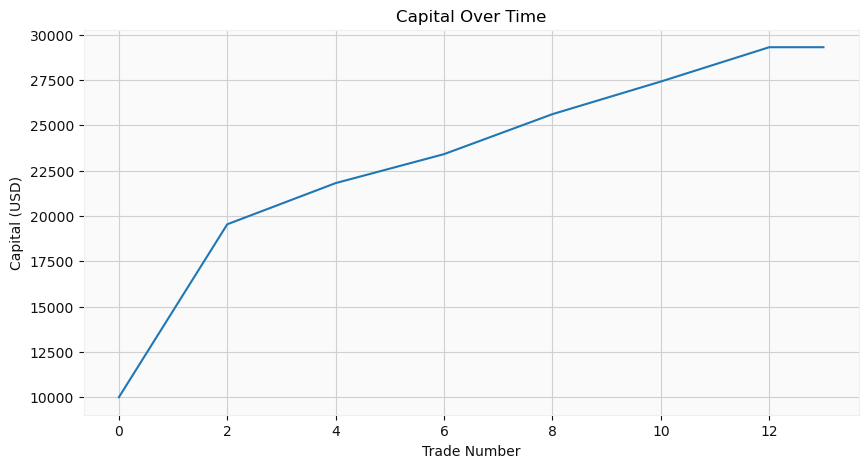

In [96]:
# Capital Over Time
capital_history = [10000]
for trade in trade_history:
    if 'profit' in trade:
        capital_history.append(capital_history[-1] + trade['profit'])

plt.figure(figsize=(10, 5))
plt.plot(capital_history)
plt.title('Capital Over Time')
plt.xlabel('Trade Number')
plt.ylabel('Capital (USD)')
plt.show()

In [97]:
#Print Predicted Probabilities
print("Predicted Probabilities:")
print(data[['Local_time_T', 'predicted_proba']].tail(10))

Predicted Probabilities:
                    Local_time_T  predicted_proba
104836 2024-12-31 14:05:00+00:00         0.333284
104837 2024-12-31 14:10:00+00:00         0.311948
104838 2024-12-31 14:15:00+00:00         0.949418
104839 2024-12-31 14:20:00+00:00         0.976227
104840 2024-12-31 14:25:00+00:00         0.944083
104841 2024-12-31 14:30:00+00:00         0.281036
104842 2024-12-31 14:35:00+00:00         0.377522
104843 2024-12-31 14:40:00+00:00         0.399632
104844 2024-12-31 14:45:00+00:00         0.443601
104845 2024-12-31 14:50:00+00:00         0.959851


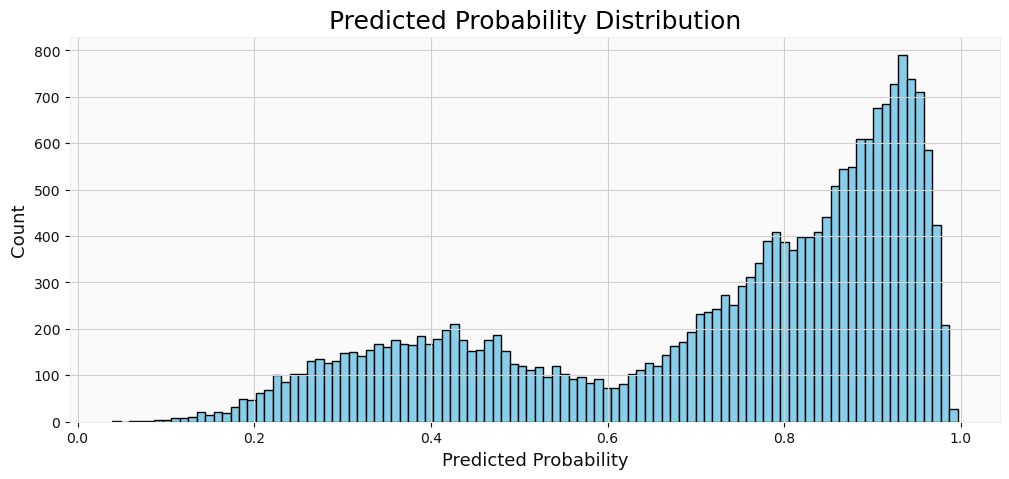

In [98]:
#Visualise predicted probability
import matplotlib.pyplot as plt

plt.figure(num=1, figsize=(12, 5))
plt.hist(y_pred_cnn_proba, bins=100, color='skyblue', edgecolor='black')
plt.title('Predicted Probability Distribution', size=18)
plt.xlabel('Predicted Probability', size=13)
plt.ylabel('Count', size=13)
plt.grid(True)
plt.show()

In [99]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.58      0.63      0.60      6002
         1.0       0.84      0.82      0.83     14956

    accuracy                           0.76     20958
   macro avg       0.71      0.72      0.72     20958
weighted avg       0.77      0.76      0.77     20958



In [100]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.91      0.47      0.62      6002
         1.0       0.82      0.98      0.89     14956

    accuracy                           0.84     20958
   macro avg       0.87      0.73      0.76     20958
weighted avg       0.85      0.84      0.82     20958



In [101]:
print(classification_report(y_test_seq, y_pred_cnn.flatten()))

              precision    recall  f1-score   support

         0.0       0.70      0.56      0.62      6001
         1.0       0.84      0.90      0.87     14937

    accuracy                           0.80     20938
   macro avg       0.77      0.73      0.74     20938
weighted avg       0.80      0.80      0.80     20938



In [102]:
print(classification_report(y_test_seq, y_pred_lstm.flatten()))

              precision    recall  f1-score   support

         0.0       0.67      0.65      0.66      6001
         1.0       0.86      0.87      0.87     14937

    accuracy                           0.81     20938
   macro avg       0.77      0.76      0.77     20938
weighted avg       0.81      0.81      0.81     20938



In [103]:
print(classification_report(y_test_seq, y_pred_cnn_lstm.flatten()))

              precision    recall  f1-score   support

         0.0       0.67      0.66      0.67      6001
         1.0       0.87      0.87      0.87     14937

    accuracy                           0.81     20938
   macro avg       0.77      0.77      0.77     20938
weighted avg       0.81      0.81      0.81     20938



In [104]:
print(classification_report(y_test_seq, y_pred_transformer.flatten()))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.63      6001
         1.0       0.84      0.89      0.87     14937

    accuracy                           0.80     20938
   macro avg       0.76      0.73      0.75     20938
weighted avg       0.79      0.80      0.80     20938

